In [16]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
original_features = pd.read_csv('../RF/temps.csv')
original_features = pd.get_dummies(original_features)

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
original_labels = np.array(original_features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
original_features= original_features.drop('actual', axis = 1)

# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Convert to numpy array
original_features = np.array(original_features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)

# The baseline predictions are the historical averages
baseline_preds = original_test_features[:, original_feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - original_test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(original_train_features, original_train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(original_test_features)

# Calculate the absolute errors
errors = abs(predictions - original_test_labels)

# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')

# Compare to baseline
improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / original_test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Average baseline error:  5.06 degrees.
Average model error: 3.83 degrees.
Improvement over baseline: 24.27 %.
Accuracy: 93.99 %.


In [17]:
original_train_features.shape

(261, 14)

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
features = pd.read_csv('../RF/temps_extended.csv', sep=',')

In [5]:
features.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [6]:
features.shape

(2191, 12)

In [7]:
features.describe()

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,2013.501597,6.523505,15.713829,7.371734,0.116276,0.010041,61.173893,61.177545,60.285897,61.177545,60.313555
std,1.709461,3.449872,8.801867,3.154971,0.251575,0.153764,13.085681,13.082281,10.732582,13.081339,15.871568
min,2011.000000,1.000000,1.000000,0.890000,0.000000,0.000000,29.000000,29.000000,45.100000,29.000000,25.000000
25%,2012.000000,4.000000,8.000000,5.140000,0.000000,0.000000,51.000000,51.000000,50.100000,51.000000,49.000000
50%,2014.000000,7.000000,16.000000,6.710000,0.000000,0.000000,60.000000,60.000000,58.800000,60.000000,60.000000
75%,2015.000000,10.000000,23.000000,9.170000,0.120000,0.000000,71.000000,71.000000,70.200000,71.000000,71.000000
max,2017.000000,12.000000,31.000000,21.250000,2.200000,3.000000,96.000000,96.000000,77.400000,96.000000,97.000000


In [8]:
import datetime

years = features['year']
months = features['month']
days = features['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

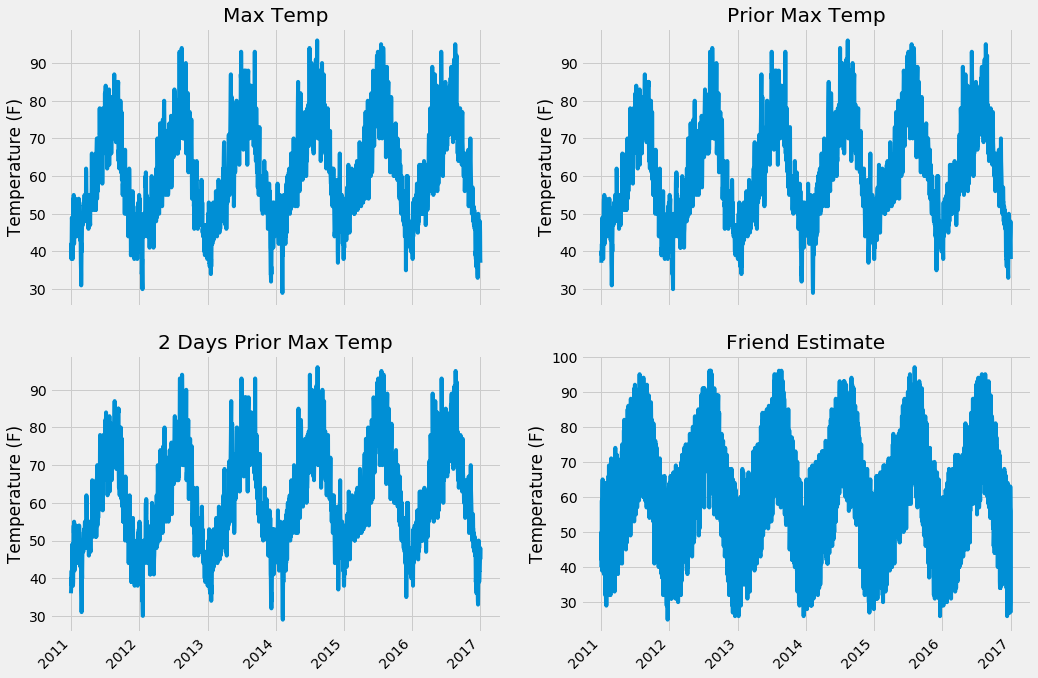

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.autofmt_xdate(rotation=45)

ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Max Temp')

ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

ax3.plot(dates, features['temp_2'])
ax3.set_xlabel(''); ax3.set_ylabel('Temperature (F)'); ax3.set_title('2 Days Prior Max Temp')

ax4.plot(dates, features['friend'])
ax4.set_xlabel(''); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

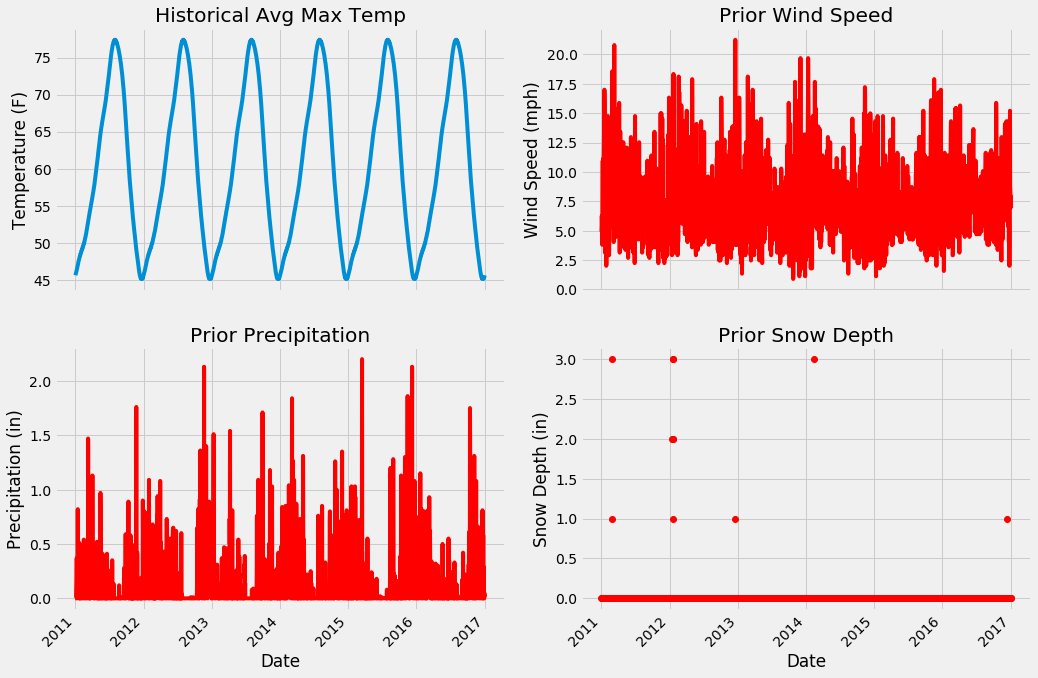

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.autofmt_xdate(rotation=45)

ax1.plot(dates, features['average'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Historical Avg Max Temp')

# Prior Avg Wind Speed 
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Wind Speed (mph)'); ax2.set_title('Prior Wind Speed')

# Prior Precipitation
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date'); ax3.set_ylabel('Precipitation (in)'); ax3.set_title('Prior Precipitation')

# Prior Snowdepth
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date'); ax4.set_ylabel('Snow Depth (in)'); ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)

In [11]:
seasons = []

for month in features['month']:
    if month in [12, 1, 2]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')
        
reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']]
reduced_features['season'] = seasons

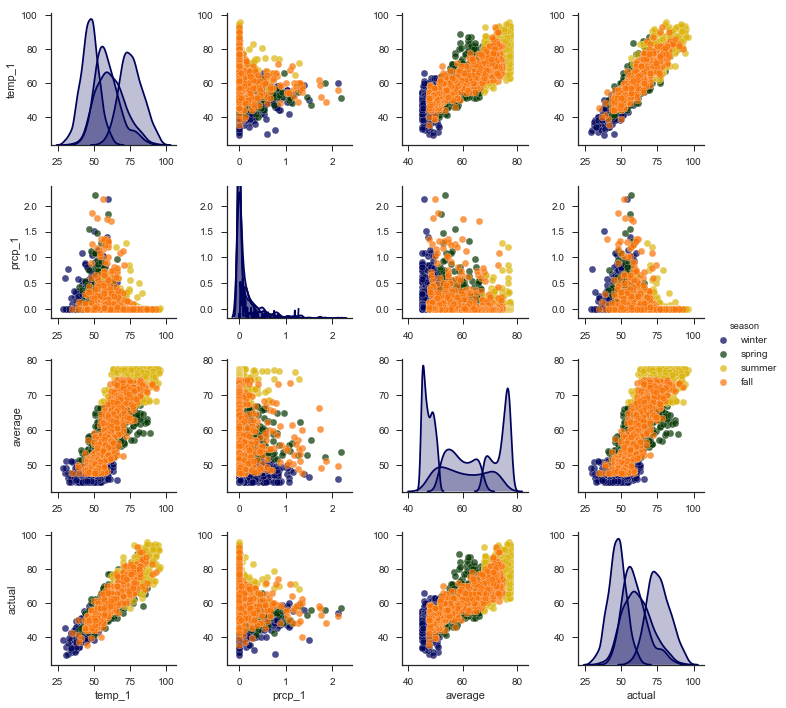

In [12]:
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7), diag_kws=dict(shade=True));

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

features = pd.get_dummies(features)

labels = features['actual']
features.drop('actual', axis=1, inplace=True)

feature_list = list(features.columns)

features = np.array(features)
labels = np.array(labels)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1643, 17)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 17)
Testing Labels Shape: (548,)


In [18]:
# Find the original feature indices 
original_feature_indices = [feature_list.index(feature) for feature in
                                      feature_list if feature not in
                                      ['ws_1', 'prcp_1', 'snwd_1']]

# Create a test set of the original features
original_test_features = test_features[:, original_feature_indices]

# Make predictions on test data using the model trained on original data
baseline_predictions = rf.predict(original_test_features)

# Performance metrics
baseline_errors = abs(baseline_predictions - test_labels)

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(baseline_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
baseline_mape = 100 * np.mean((baseline_errors / test_labels))

# Calculate and display accuracy
baseline_accuracy = 100 - baseline_mape
print('Accuracy:', round(baseline_accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 4.3 degrees.
Accuracy: 92.49 %.


In [19]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=100)
rf_exp.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [20]:
# Make predictions on test data
predictions = rf_exp.predict(test_features)

# Performance metrics
errors = abs(predictions - test_labels)

print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Compare to baseline
improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 3.72 degrees.
Improvement over baseline: 16.41 %.
Accuracy: 93.72 %.


However, it may be possible we have too many features. We saw earlier that some of the features, especially our friend’s prediction, looked more like noise than an accurate predictor of the maximum temperature. Extra features can decrease performance because they may “confuse” the model by giving it irrelevant data that prevents it from learning the actual relationships. The random forest performs implicit feature selection because it splits nodes on the most important variables, but other machine learning models do not. One approach to improve other models is therefore to use the random forest feature importances to reduce the number of variables in the problem. In our case, we will use the feature importances to decrease the number of features for our random forest model, because, in addition to potentially increasing performance, reducing the number of features will shorten the run time of the model.

In [23]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: prcp_1               Importance: 0.7
Variable: snwd_1               Importance: 0.19
Variable: day                  Importance: 0.03
Variable: ws_1                 Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: temp_1               Importance: 0.0
Variable: average              Importance: 0.0
Variable: friend               Importance: 0.0
Variable: weekday_Fri          Importance: 0.0
Variable: weekday_Mon          Importance: 0.0
Variable: weekday_Sat          Importance: 0.0
Variable: weekday_Sun          Importance: 0.0


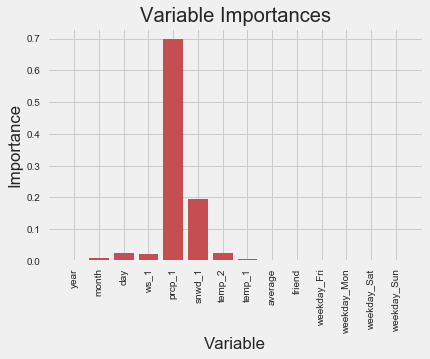

In [26]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

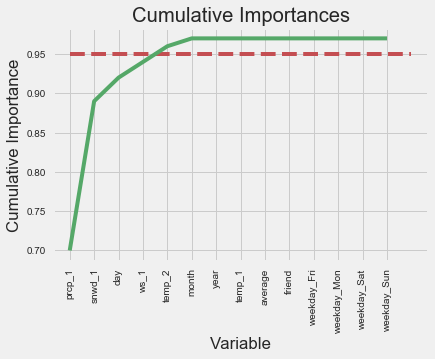

In [38]:
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

plt.hlines(y=0.95, xmin=0, xmax=len(sorted_importances), colors='r', linestyles='dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [39]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (1643, 6)
Important test features shape: (548, 6)


In [40]:
# Train the expanded model on only the important features
rf_exp.fit(important_train_features, train_labels);

In [41]:
# Make predictions on test data
predictions = rf_exp.predict(important_test_features)

# Performance metrics
errors = abs(predictions - test_labels)

print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 4.6151 degrees.
Accuracy: 92.16 %.


In [42]:
# Use time library for run time evaluation
import time

# All features training and testing time
all_features_time = []

# Do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(train_features, train_labels)
    all_features_predictions = rf_exp.predict(test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('All features total training and testing time:', round(all_features_time, 2), 'seconds.')

All features total training and testing time: 12.69 seconds.


In [43]:
# Time training and testing for reduced feature set
reduced_features_time = []

# Do 10 iterations and take average
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(important_train_features, train_labels)
    reduced_features_predictions = rf_exp.predict(important_test_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)

reduced_features_time = np.mean(reduced_features_time)
print('Reduced features total training and testing time:', round(reduced_features_time, 2), 'seconds.')

Reduced features total training and testing time: 7.1 seconds.


In [44]:
all_accuracy =  100 * (1- np.mean(abs(all_features_predictions - test_labels) / test_labels))
reduced_accuracy = 100 * (1- np.mean(abs(reduced_features_predictions - test_labels) / test_labels))

comparison = pd.DataFrame({'features': ['all (17)', 'reduced (5)'], 
                           'run_time': [round(all_features_time, 2), round(reduced_features_time, 2)],
                           'accuracy': [round(all_accuracy, 2), round(reduced_accuracy, 2)]})

comparison[['features', 'accuracy', 'run_time']]

,features,accuracy,run_time
0,all (17),93.72,12.69
1,reduced (5),92.16,7.10


In [45]:
relative_accuracy_decrease = 100 * (all_accuracy - reduced_accuracy) / all_accuracy
print('Relative decrease in accuracy:', round(relative_accuracy_decrease, 3), '%.')

relative_runtime_decrease = 100 * (all_features_time - reduced_features_time) / all_features_time
print('Relative decrease in run time:', round(relative_runtime_decrease, 3), '%.')

Relative decrease in accuracy: 1.666 %.
Relative decrease in run time: 44.061 %.


In [46]:
# Find the original feature indices 
original_feature_indices = [feature_list.index(feature) for feature in
                                      feature_list if feature not in
                                      ['ws_1', 'prcp_1', 'snwd_1']]

# Create a test set of the original features
original_test_features = test_features[:, original_feature_indices]

# Time to train on original data set (1 year)
original_features_time = []

# Do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf.fit(original_train_features, original_train_labels)
    original_features_predictions = rf.predict(original_test_features)
    end_time = time.time()
    original_features_time.append(end_time - start_time)
    
original_features_time = np.mean(original_features_time)

In [47]:
# Calculate mean absolute error for each model
original_mae = np.mean(abs(original_features_predictions - test_labels))
exp_all_mae = np.mean(abs(all_features_predictions - test_labels))
exp_reduced_mae = np.mean(abs(reduced_features_predictions - test_labels))

# Calculate accuracy for model trained on 1 year of data
original_accuracy = 100 * (1 - np.mean(abs(original_features_predictions - test_labels) / test_labels))

# Create a dataframe for comparison
model_comparison = pd.DataFrame({'model': ['original', 'exp_all', 'exp_reduced'], 
                                 'error (degrees)':  [original_mae, exp_all_mae, exp_reduced_mae],
                                 'accuracy': [original_accuracy, all_accuracy, reduced_accuracy],
                                 'run_time (s)': [original_features_time, all_features_time, reduced_features_time]})

# Order the dataframe
model_comparison = model_comparison[['model', 'error (degrees)', 'accuracy', 'run_time (s)']]

In [48]:
model_comparison

,model,error (degrees),accuracy,run_time (s)
0,original,4.298062,92.491358,3.189175
1,exp_all,3.717810,93.723222,12.686619
2,exp_reduced,4.615121,92.161982,7.096712


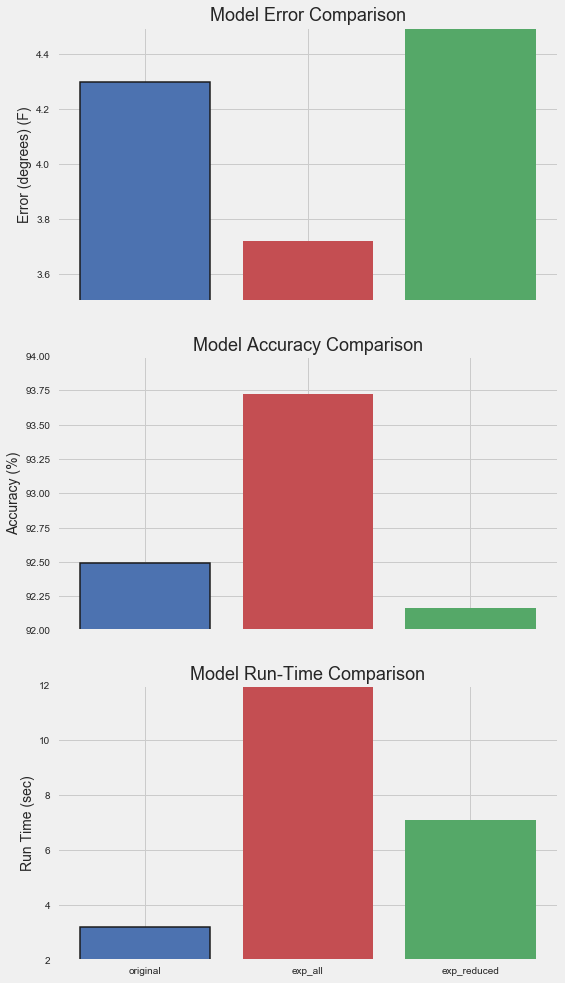

In [49]:
# Make plots 
# Set up the plotting layout
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize = (8,16), sharex = True)

# Set up x-axis
x_values = [0, 1, 2]
labels = list(model_comparison['model'])
plt.xticks(x_values, labels)

# Set up fonts
fontdict = {'fontsize': 18}
fontdict_yaxis = {'fontsize': 14}

# Error Comparison
ax1.bar(x_values, model_comparison['error (degrees)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax1.set_ylim(bottom = 3.5, top = 4.5)
ax1.set_ylabel('Error (degrees) (F)', fontdict = fontdict_yaxis); 
ax1.set_title('Model Error Comparison', fontdict= fontdict)

# Accuracy Comparison
ax2.bar(x_values, model_comparison['accuracy'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax2.set_ylim(bottom = 92, top = 94)
ax2.set_ylabel('Accuracy (%)', fontdict = fontdict_yaxis); 
ax2.set_title('Model Accuracy Comparison', fontdict= fontdict)

# Run Time Comparison
ax3.bar(x_values, model_comparison['run_time (s)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax3.set_ylim(bottom = 2, top = 12)
ax3.set_ylabel('Run Time (sec)', fontdict = fontdict_yaxis); 
ax3.set_title('Model Run-Time Comparison', fontdict= fontdict);

https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd